<a href="https://colab.research.google.com/github/A790227/Final-Project-Lighthouse/blob/main/raw_process_eda_meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Beauty_and_Personal_Care")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

The repository for McAuley-Lab/Amazon-Reviews-2023 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/McAuley-Lab/Amazon-Reviews-2023.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


meta_Beauty_and_Personal_Care.jsonl:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

DatasetDict({
    full: Dataset({
        features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
        num_rows: 1028914
    })
})
Total number of rows: 1028914
Calculated sample size: 385
Sampled dataset: Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
    num_rows: 385
})


Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Sample saved to sampled_meta_data.jsonl


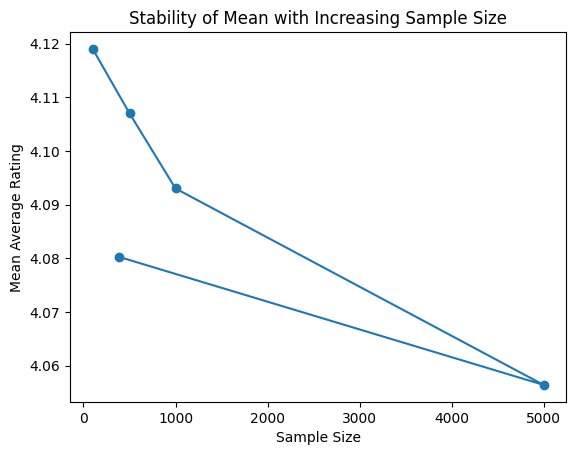

In [ ]:

from datasets import load_dataset
from math import ceil
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Beauty_and_Personal_Care")
print(ds)

# Access the 'full' split
split_name = 'full'
population_size = len(ds[split_name])
print(f"Total number of rows: {population_size}")

# Step 2: Calculate Sample Size
def calculate_sample_size(population_size, confidence_level=0.95, margin_of_error=0.05, proportion=0.5):
    z_scores = {0.90: 1.645, 0.95: 1.96, 0.99: 2.576}
    z = z_scores[confidence_level]
    numerator = (z**2) * proportion * (1 - proportion)
    denominator = margin_of_error**2
    sample_size = numerator / denominator
    sample_size = sample_size / (1 + (sample_size - 1) / population_size)  # Adjust for finite population
    return ceil(sample_size)

# Calculate the sample size
sample_size = calculate_sample_size(population_size)
print(f"Calculated sample size: {sample_size}")

# Step 3: Randomly Sample the Dataset
sampled_ds = ds[split_name].shuffle(seed=42).select(range(sample_size))
print(f"Sampled dataset: {sampled_ds}")

# Step 4: Save the Sample
sampled_ds.to_json("sampled_meta_data.jsonl")
print("Sample saved to sampled_meta_data.jsonl")

# Step 5: Evaluate Sample Stability
# Analyze a metric across different sample sizes
sample_sizes = [100, 500, 1000, 5000, sample_size]
means = []

for size in sample_sizes:
    sample = ds[split_name].shuffle(seed=42).select(range(size))
    mean_rating = sum(sample['average_rating']) / len(sample)  # Use 'average_rating'
    means.append(mean_rating)

# Plot the stability of the mean
plt.plot(sample_sizes, means, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Mean Average Rating')
plt.title('Stability of Mean with Increasing Sample Size')
plt.show()

DatasetDict({
    full: Dataset({
        features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
        num_rows: 1028914
    })
})
Total number of rows: 1028914
New sample size (0.4% of population): 4116
Sampled dataset: Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
    num_rows: 4116
})


Creating json from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Sample saved to sampled_meta_data_0_4_percent.jsonl


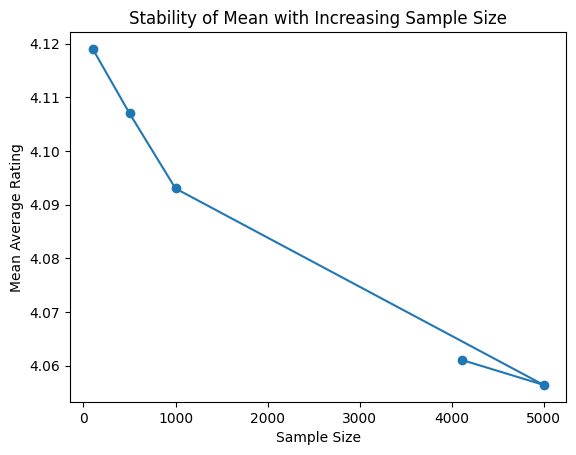

In [ ]:
from datasets import load_dataset
from math import ceil
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Beauty_and_Personal_Care")
print(ds)

# Access the 'full' split
split_name = 'full'
population_size = len(ds[split_name])
print(f"Total number of rows: {population_size}")

# Step 2: Calculate 0.4% Increased Sample Size
increase_percentage = 0.004  # 0.4%
additional_sample_size = ceil(population_size * increase_percentage)
new_sample_size = additional_sample_size
print(f"New sample size (0.4% of population): {new_sample_size}")

# Step 3: Randomly Sample the Dataset
sampled_ds = ds[split_name].shuffle(seed=42).select(range(new_sample_size))
print(f"Sampled dataset: {sampled_ds}")

# Step 4: Save the Sample
sampled_ds.to_json("sampled_meta_data_0_4_percent.jsonl")
print("Sample saved to sampled_meta_data_0_4_percent.jsonl")

# Step 5: Evaluate Sample Stability
# Analyze a metric across different sample sizes
sample_sizes = [100, 500, 1000, 5000, new_sample_size]
means = []

for size in sample_sizes:
    sample = ds[split_name].shuffle(seed=42).select(range(size))
    mean_rating = sum(sample['average_rating']) / len(sample)  # Use 'average_rating'
    means.append(mean_rating)

# Plot the stability of the mean
plt.plot(sample_sizes, means, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Mean Average Rating')
plt.title('Stability of Mean with Increasing Sample Size')
plt.show()


# EDA

In [ ]:
# Inspect the column names
print(ds[split_name].column_names)

# Convert to pandas DataFrame for easier exploration
ds_df = ds[split_name].to_pandas()

# Check basic information about the dataset
print(ds_df.info())

['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028914 entries, 0 to 1028913
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   main_category    926018 non-null   object 
 1   title            1028914 non-null  object 
 2   average_rating   1028914 non-null  float64
 3   rating_number    1028914 non-null  int64  
 4   features         1028914 non-null  object 
 5   description      1028914 non-null  object 
 6   price            1028914 non-null  object 
 7   images           1028914 non-null  object 
 8   videos           1028914 non-null  object 
 9   store            978204 non-null   object 
 10  categories       1028914 non-null  object 
 11  details          1028914 non-null  object 
 12  pa

In [ ]:
missing_values = ds_df.isnull().mean().sort_values(ascending=False)
print(missing_values)

bought_together    1.000000
author             0.999942
subtitle           0.999807
main_category      0.100004
store              0.049285
title              0.000000
average_rating     0.000000
rating_number      0.000000
images             0.000000
price              0.000000
description        0.000000
features           0.000000
details            0.000000
categories         0.000000
videos             0.000000
parent_asin        0.000000
dtype: float64


In [ ]:
import numpy as np

# Replace non-numeric characters and handle empty strings
ds_df['price_cleaned'] = ds_df['price'].replace('[^\d.]', '', regex=True)
ds_df['price_cleaned'] = ds_df['price_cleaned'].replace('', np.nan)  # Replace empty strings with NaN
ds_df['price_cleaned'] = ds_df['price_cleaned'].astype(float)  # Convert to float

In [ ]:
# Impute missing prices with the median without using inplace=True
median_price = ds_df['price_cleaned'].median()
ds_df['price_cleaned'] = ds_df['price_cleaned'].fillna(median_price)

In [ ]:
print(ds_df.describe())

       average_rating  rating_number  price_cleaned
count    1.028914e+06   1.028914e+06   1.028914e+06
mean     4.059462e+00   2.245609e+02   2.087070e+01
std      7.602596e-01   1.595141e+03   5.824634e+01
min      1.000000e+00   1.000000e+00   0.000000e+00
25%      3.700000e+00   5.000000e+00   1.599000e+01
50%      4.200000e+00   1.900000e+01   1.599000e+01
75%      4.600000e+00   7.800000e+01   1.599000e+01
max      5.000000e+00   3.401820e+05   1.299999e+04


In [ ]:
print(ds_df['main_category'].value_counts())

main_category
All Beauty                      737549
Health & Personal Care           71800
Premium Beauty                   34898
Amazon Home                      32143
Tools & Home Improvement         14387
AMAZON FASHION                   13055
Industrial & Scientific           4901
Sports & Outdoors                 2425
Grocery                           2181
Toys & Games                      2066
Arts, Crafts & Sewing             2049
Office Products                   1696
Cell Phones & Accessories         1222
All Electronics                   1003
Baby                               855
Pet Supplies                       764
Computers                          629
Musical Instruments                599
Automotive                         374
Movies & TV                        323
Books                              246
Home Audio & Theater               207
Digital Music                      183
Handmade                           148
Camera & Photo                     141
Appliances 

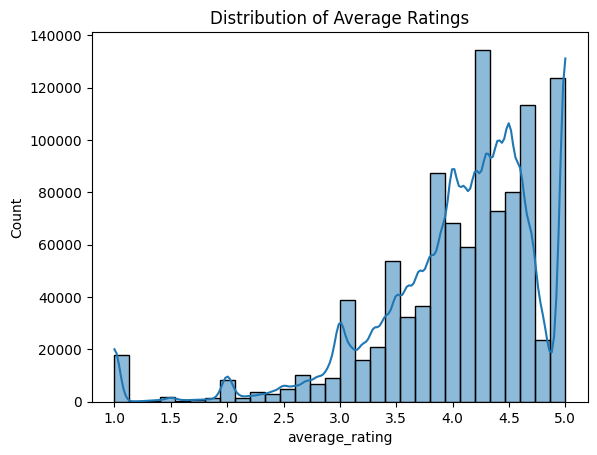

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ds_df['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.show()

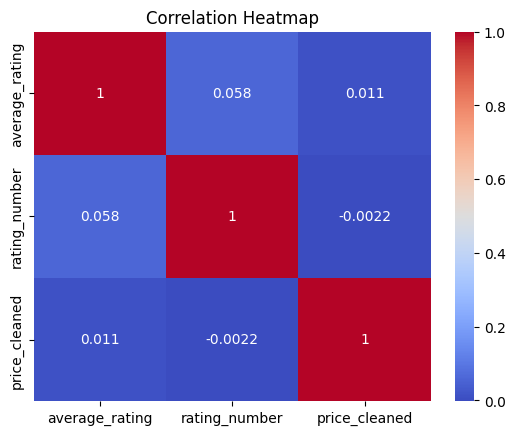

In [ ]:
numeric_cols = ['average_rating', 'rating_number', 'price_cleaned']
sns.heatmap(ds_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

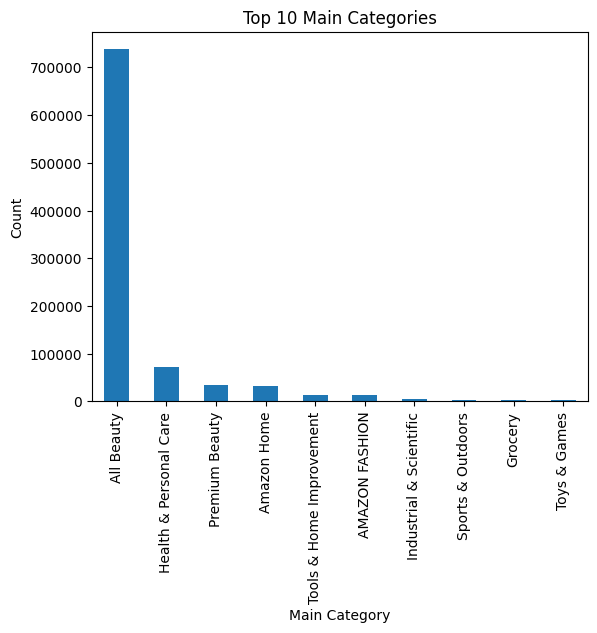

In [ ]:
ds_df['main_category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.show()

In [ ]:
columns_to_drop = ['bought_together', 'subtitle', 'author']
ds_df_cleaned = ds_df.drop(columns=columns_to_drop)

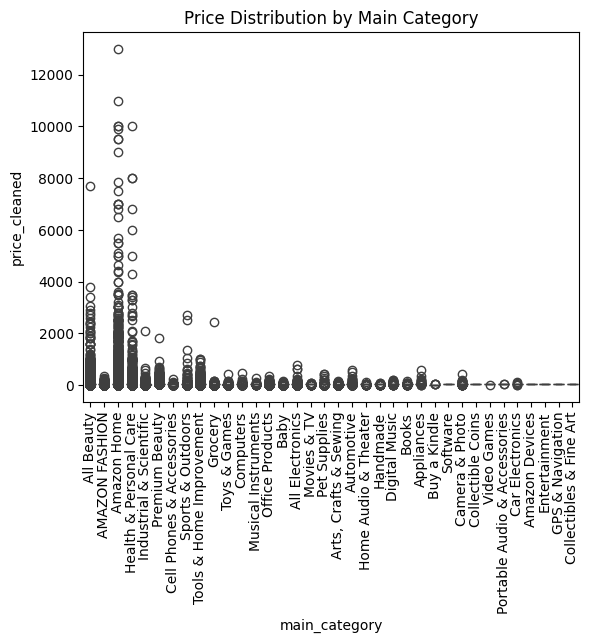

In [ ]:
sns.boxplot(data=ds_df, x='main_category', y='price_cleaned')
plt.xticks(rotation=90)
plt.title('Price Distribution by Main Category')
plt.show()

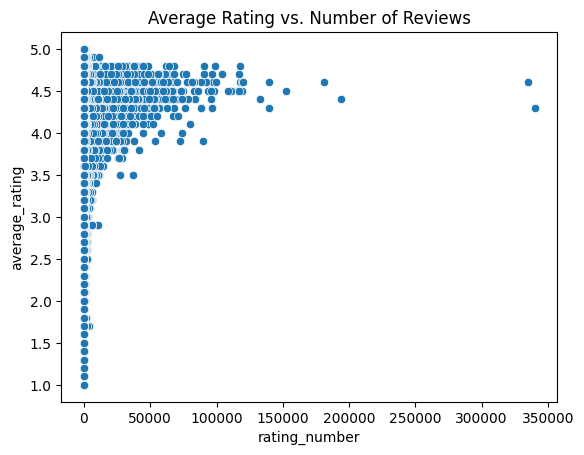

In [ ]:
sns.scatterplot(data=ds_df, x='rating_number', y='average_rating')
plt.title('Average Rating vs. Number of Reviews')
plt.show()